## MLFlow Model Serving - MLFlow 2.0.1

#### Topics Covered:

* Conda Environment Creation
* Model training important steps written as python function
* Train basic classifier and log it as a experiment


* Different methods to register ML model in MLFlow Registry
* Transition Model stage : None(default), Staging, Production or Archived
* Load Model from MLflow Registry and do Prediction
* Model Serving - Serving an ML Model from MLFlow Model Registry

will see how to log various paramets, model metrics, model itself and other aertifacts like charts etc. 

**Explanation with live demo is also available at :**

* **MLFlow Part 1: Experiment Tracking using MLFlow -  https://www.youtube.com/watch?v=r0do1KVEGqM**

* **MLFlow Part 2: Model Serving from MLFlow Model Registry - URL you are watching**

<img src='mlflow.png'>

### Create Conda environment

1. `conda create -n envname python=3.9 ipykernel` 
it will create a conda env named envname and install python version 3.9 and a ipykernel inside this environment

2. Activate the environment
`conda activate envname`

3. add newly created environment to the notebook as kernel
`python -m ipykernel install --user --name=envname` 

4. install notebook inside the environment
`pip install notebook`

5. Now install all required dependencies to run this notebook

* `pip install pandas`
* `pip install numpy`
* `pip install scikit-learn`
* `pip install matplotlib`
* `pip install mlflow`

Now open the notebook using below command: (from the anaconda prompt inside conda environment)

`jupyter notebook`


In [1]:
!mlflow --version

mlflow, version 2.15.1


### Create functions for all the steps involved in complete model training lifecycle
Note: Model creation is not the main purpose of this notebook so not everything related to data cleaning and preprocissing is present. Main idea is to understand how to track experiment using MLFlow.

In [2]:
def load_data(url):
    import pandas as pd
    # Load dataset
    data = pd.read_csv(filepath_or_buffer=url,sep=',')
    return data

In [3]:
def train_test_split(final_data,target_column):
    from sklearn.model_selection import train_test_split
    X = final_data.loc[:, final_data.columns != target_column]
    y = final_data.loc[:, final_data.columns == target_column]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify = y, random_state=47)
    return X_train, X_test, y_train, y_test

In [4]:
def training_basic_classifier(X_train,y_train):
    from sklearn.linear_model import LogisticRegression
    classifier = LogisticRegression()
    classifier.fit(X_train,y_train)
    
    return classifier

In [5]:
def predict_on_test_data(model,X_test):
    y_pred = model.predict(X_test)
    return y_pred

In [6]:
def predict_prob_on_test_data(model,X_test):
    y_pred = model.predict_proba(X_test)
    return y_pred

In [7]:
def get_metrics(y_true, y_pred, y_pred_prob):
    from sklearn.metrics import accuracy_score,precision_score,recall_score,log_loss
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred,average='micro')
    recall = recall_score(y_true, y_pred,average='micro')
    entropy = log_loss(y_true, y_pred_prob)
    return {'accuracy': round(acc, 2), 'precision': round(prec, 2), 'recall': round(recall, 2), 'entropy': round(entropy, 2)}

In [8]:
def create_roc_auc_plot(clf, X_data, y_data):
    import matplotlib.pyplot as plt
    from sklearn import metrics
    metrics.plot_roc_curve(clf, X_data, y_data) 
    plt.savefig('roc_auc_curve.png')

In [9]:
def create_confusion_matrix_plot(clf, X_test, y_test):
    import matplotlib.pyplot as plt
    from sklearn.metrics import plot_confusion_matrix
    plot_confusion_matrix(clf, X_test, y_test)
    plt.savefig('confusion_matrix.png')

### Start calling above functions one by one and see the output

**Data Loading**

In [10]:
url = 'https://raw.githubusercontent.com/TripathiAshutosh/dataset/main/iris.csv'
data = load_data(url)
data.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Train-Test Split**

In [11]:
target_column = 'class'
X_train, X_test, y_train, y_test = train_test_split(data, target_column)

In [12]:
X_test.head()

,sepal-length,sepal-width,petal-length,petal-width
26,5.0,3.4,1.6,0.4
41,4.5,2.3,1.3,0.3
49,5.0,3.3,1.4,0.2
44,5.1,3.8,1.9,0.4
141,6.9,3.1,5.1,2.3


**Model Training** (Basic classifier, as here idea is not to create the best model however focus is on MLFlow model serving)

In [13]:
model = training_basic_classifier(X_train,y_train)

c:\users\ankit_aj\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\ankit_aj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**See the prediction outcome**

In [14]:
y_pred = predict_on_test_data(model,X_test)
print(y_pred)
y_pred_prob = predict_prob_on_test_data(model,X_test)
print(y_pred_prob)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor']
[[9.60709975e-01 3.92890263e-02 9.98992339e-07]
 [9.34712234e-01 6.52871662e-02 5.99853365e-07]
 [9.70974712e-01 2.90250287e-02 2.58905946e-07]
 [9.54951629e-01 4.50458885e-02 2.48222700e-06]
 [1.74784820e-04 1.07993870e-01 8.91831345e-01]
 [1.59390929e-

**print some metrics**

In [15]:
run_metrics = get_metrics(y_test, y_pred, y_pred_prob)

In [16]:
run_metrics

{'accuracy': 0.93, 'precision': 0.93, 'recall': 0.93, 'entropy': 0.17}

**Generate Confusion Matrix**

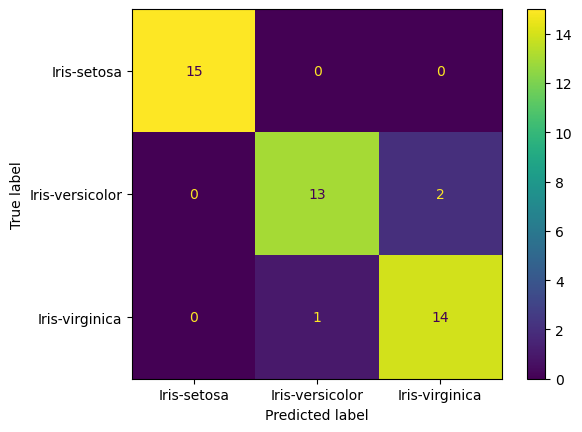

In [17]:
create_confusion_matrix_plot(model, X_test, y_test)

### Define create_experiment function to track your model experiment within MLFlow

In [18]:
def create_experiment(experiment_name,run_name, run_metrics,model, confusion_matrix_path = None, 
                      roc_auc_plot_path = None, run_params=None):
    import mlflow
    #mlflow.set_tracking_uri("http://localhost:5000") 
    #use above line if you want to use any database like sqlite as backend storage for model else comment this line
    mlflow.set_experiment(experiment_name)
    
    with mlflow.start_run(run_name=run_name):
        
        if not run_params == None:
            for param in run_params:
                mlflow.log_param(param, run_params[param])
            
        for metric in run_metrics:
            mlflow.log_metric(metric, run_metrics[metric])
        
        
        
        if not confusion_matrix_path == None:
            mlflow.log_artifact(confusion_matrix_path, 'confusion_materix')
            
        if not roc_auc_plot_path == None:
            mlflow.log_artifact(roc_auc_plot_path, "roc_auc_plot")
        
        mlflow.set_tag("tag1", "Iris Classifier")
        mlflow.set_tags({"tag2":"Logistic Regression", "tag3":"Multiclassification using Ovr - One vs rest class"})
        mlflow.sklearn.log_model(model, "model")
    print('Run - %s is logged to Experiment - %s' %(run_name, experiment_name))

### Start Mlflow server

**Prefer to run it from command line**

`mlflow ui` This will launch mlflow UI in the browser and you can access it using `localhost:5000` but this uses file as backend to store experiments and model artifacts. It does not support model registry functionality. 

To use model registry, you need to have some backend database other than the file system. Ex mysql, sqlite or any other DB mentioned in mlflow docs under backend storage. Refer: https://www.mlflow.org/docs/latest/tracking.html?highlight=scenario#how-runs-and-artifacts-are-recorded

#### In this tutorial , we will use sqlite as backend, so Now run this command to start mlflow with backend.
`mlflow server --backend-store-uri sqlite:///mlflow.db --default-artifact-root ./artifacts --host 0.0.0.0 --port 5000`

**Execute the create_experiment function and log experiment**

In [19]:
from datetime import datetime
experiment_name = "iris_classifier_"+ str(datetime.now().strftime("%d-%m-%y")) ##basic classifier
run_name="iris_classifier_"+str(datetime.now().strftime("%d-%m-%y"))
create_experiment(experiment_name,run_name,run_metrics,model,'confusion_matrix.png')

2024/08/29 14:18:46 INFO mlflow.tracking.fluent: Experiment with name 'iris_classifier_29-08-24' does not exist. Creating a new experiment.
2024/08/29 14:18:50 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


Run - iris_classifier_29-08-24 is logged to Experiment - iris_classifier_29-08-24


In [20]:
import mlflow
logged_model = 'runs:/dff923c9e0924e8e968eaed4cab33ee9/model'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

# Predict on a Pandas DataFrame.
import pandas as pd
loaded_model.predict(pd.DataFrame(X_test))

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor'], dtype=object)

**Open http://localhost:5000 in the browser, here you will find the recorded experiment**

### Adding an MLflow Model to the Model Registry
Reference: https://www.mlflow.org/docs/latest/model-registry.html

There are three programmatic ways to add a model to the registry. 
First, you can use the mlflow.<model_flavor>.log_model() method. 
For example, in your code:

#### Method 1

In [21]:
def create_exp_and_register_model(experiment_name,run_name,run_metrics,model,confusion_matrix_path = None, 
                      roc_auc_plot_path = None, run_params=None):
    mlflow.set_tracking_uri("http://localhost:5000") 
    #use above line if you want to use any database like sqlite as backend storage for model else comment this line
    mlflow.set_experiment(experiment_name)
    with mlflow.start_run(run_name=run_name) as run:
        if not run_params == None:
            for param in run_params:
                mlflow.log_param(param, run_params[param])
            
        for metric in run_metrics:
            mlflow.log_metric(metric, run_metrics[metric])
        
        if not confusion_matrix_path == None:
            mlflow.log_artifact(confusion_matrix_path, 'confusion_materix')
            
        if not roc_auc_plot_path == None:
            mlflow.log_artifact(roc_auc_plot_path, "roc_auc_plot")
        
        mlflow.set_tag("tag1", "Random Forest")
        mlflow.set_tags({"tag2":"Randomized Search CV", "tag3":"Production"})
        mlflow.sklearn.log_model(model, "model",registered_model_name="iris-classifier")

In the above code snippet, if a registered model with the name doesn’t exist, the method registers a new model and creates Version 1. If a registered model with the name exists, the method creates a new model version.

In [22]:
experiment_name = "iris_classifier_method-1" #+ str(datetime.now().strftime("%d-%m-%y")) ##basic classifier
run_name="iris_classifier_method-1" #+str(datetime.now().strftime("%d-%m-%y"))
create_exp_and_register_model(experiment_name,run_name,run_metrics,model,'confusion_matrix.png')

2022/12/05 10:20:48 INFO mlflow.tracking.fluent: Experiment with name 'iris_classifier_method-1' does not exist. Creating a new experiment.
Successfully registered model 'iris-classifier'.
2022/12/05 10:20:51 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: iris-classifier, version 1
Created version '1' of model 'iris-classifier'.


#### Method 2
The second way is to use the mlflow.register_model() method, after all your experiment runs complete and when you have decided which model is most suitable to add to the registry. For this method, you will need the run_id as part of the runs:URI argument.

In [23]:
import mlflow
with mlflow.start_run(run_name=run_name) as run:
    result = mlflow.register_model(
        "runs:/dff923c9e0924e8e968eaed4cab33ee9/model",
        "iris-classifier-2"
    )

Successfully registered model 'iris-classifier-2'.
2022/12/05 10:24:15 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: iris-classifier-2, version 1
Created version '1' of model 'iris-classifier-2'.


If a registered model with the name doesn’t exist, the method registers a new model, creates Version 1, and returns a ModelVersion MLflow object. If a registered model with the name exists, the method creates a new model version and returns the version object.

#### Method 3
And finally, you can use the create_registered_model() to create a new registered model. If the model name exists, this method will throw an MlflowException because creating a new registered model requires a unique name.

In [24]:
import mlflow
client = mlflow.tracking.MlflowClient()
client.create_registered_model("basic-classifier-method-3")

#While the method above creates an empty registered model with no version associated, 

<RegisteredModel: creation_timestamp=1670216158466, description='', last_updated_timestamp=1670216158466, latest_versions=[], name='basic-classifier-method-3', tags={}>

In [25]:
#the method below creates a new version of the model.
client = mlflow.tracking.MlflowClient()
result = client.create_model_version(
    name="basic-classifier-method-3",
    source="dff923c9e0924e8e968eaed4cab33ee9/artifacts/model",
    run_id="dff923c9e0924e8e968eaed4cab33ee9"
)

2022/12/05 10:27:01 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: basic-classifier-method-3, version 1


### Fetching an MLflow Model from the Model Registry

**Fetch a specific model version**

In [26]:
import mlflow.pyfunc

model_name = "iris-classifier"
model_version = 1

model = mlflow.pyfunc.load_model(
    model_uri=f"models:/{model_name}/{model_version}"
)

y_pred = model.predict(X_test)
print(y_pred)

sklearn_model = mlflow.sklearn.load_model(
    model_uri=f"models:/{model_name}/{model_version}"
)
y_pred_prob = sklearn_model.predict_proba(X_test)
print(y_pred_prob)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor']
[[9.60711333e-01 3.92876679e-02 9.99542796e-07]
 [9.34724656e-01 6.52747435e-02 6.00175464e-07]
 [9.70976219e-01 2.90235221e-02 2.59059042e-07]
 [9.54951169e-01 4.50463478e-02 2.48359682e-06]
 [1.74767542e-04 1.08008426e-01 8.91816806e-01]
 [1.59375139e-

**Fetch the latest model version in a specific stage**

To fetch a model version by stage, simply provide the model stage as part of the model URI, and it will fetch the most recent version of the model in that stage.

#### Transitioning an MLflow Model’s Stage

In [27]:
client = mlflow.tracking.MlflowClient()
client.transition_model_version_stage(
    name="iris-classifier",
    version=1,
    stage="Production"
)

<ModelVersion: creation_timestamp=1670215851622, current_stage='Production', description='', last_updated_timestamp=1670216461022, name='iris-classifier', run_id='8b6cfc4a30b84ae3bcbed3bb7875c5b4', run_link='', source='./artifacts/2/8b6cfc4a30b84ae3bcbed3bb7875c5b4/artifacts/model', status='READY', status_message='', tags={}, user_id='', version='1'>

In [28]:
import mlflow.pyfunc

model_name = "iris-classifier"
stage = 'Production'

model = mlflow.pyfunc.load_model(
    model_uri=f"models:/{model_name}/{stage}"
)

y_pred = model.predict(X_test)
print(y_pred)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor']


In [30]:
import mlflow.pyfunc

model_name = "iris-classifier"
stage = 'Production'

model = mlflow.sklearn.load_model(
    model_uri=f"models:/{model_name}/{stage}"
)

y_pred = model.predict([[6.7,3.3,5.7,2.1]])
print(y_pred)
y_pred_prob = model.predict_proba([[6.7,3.3,5.7,2.1]])
print(y_pred_prob)

['Iris-virginica']
[[2.92600763e-05 4.04458191e-02 9.59524921e-01]]


C:\Users\Ashutosh Tripathi\anaconda3\envs\mlflow2.0\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Ashutosh Tripathi\anaconda3\envs\mlflow2.0\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### Serving an MLflow Model from Model Registry

In [31]:
mlflow.set_tracking_uri('http://localhost:5000')

**Run this from command line**
`set MLFLOW_TRACKING_URI=http://localhost:5000` #use export MLFLOW_TRACKING_URI=http://localhost:5000 if in linux

<img src='env variable.png'>

## **Now run this command from command line**

make sure to write the different port - other than the one you used while starting mlflow server

`mlflow models serve --model-uri models:/iris-classifier/Production -p 1234 --no-conda`



### Do Prediction

In [19]:
import requests

inference_request = {
        "dataframe_records": [[6.7,3.3,5.7,2.1]]
}

endpoint = "http://localhost:1234/invocations"

response = requests.post(endpoint, json=inference_request)

print(response.text)

{"predictions": ["Iris-virginica"]}


### Batch Prediction

In [20]:
X_test

,sepal-length,sepal-width,petal-length,petal-width
26,5.0,3.4,1.6,0.4
41,4.5,2.3,1.3,0.3
49,5.0,3.3,1.4,0.2
44,5.1,3.8,1.9,0.4
141,6.9,3.1,5.1,2.3
108,6.7,2.5,5.8,1.8
86,6.7,3.1,4.7,1.5
142,5.8,2.7,5.1,1.9
65,6.7,3.1,4.4,1.4
61,5.9,3.0,4.2,1.5


In [19]:
import requests
lst = X_test.values.tolist()
inference_request = {
        "dataframe_records": lst
}
endpoint = "http://localhost:1234/invocations"
response = requests.post(endpoint, json=inference_request)
print(response)

<Response [200]>


In [20]:
print(response.text)

{"predictions": ["Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-virginica", "Iris-virginica", "Iris-versicolor", "Iris-virginica", "Iris-versicolor", "Iris-versicolor", "Iris-virginica", "Iris-versicolor", "Iris-virginica", "Iris-setosa", "Iris-setosa", "Iris-virginica", "Iris-setosa", "Iris-versicolor", "Iris-versicolor", "Iris-versicolor", "Iris-versicolor", "Iris-virginica", "Iris-virginica", "Iris-setosa", "Iris-setosa", "Iris-virginica", "Iris-versicolor", "Iris-setosa", "Iris-versicolor", "Iris-virginica", "Iris-setosa", "Iris-virginica", "Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-virginica", "Iris-virginica", "Iris-virginica", "Iris-versicolor", "Iris-versicolor", "Iris-virginica", "Iris-virginica", "Iris-versicolor", "Iris-versicolor"]}


## Thank You

### Next Steps:

1. Deploy Model using Python Flask and expose end points
2. Deploy Model using FastAPI